# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [344]:
import numpy

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

data_train = numpy.loadtxt('C:/Users/Илья/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('C:/Users/Илья/Downloads/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [355]:
X_train = data_train[:,0]
Y_train = data_train[:,1]
X_test = data_test[:,0]
Y_test = data_test[:,1]

# Сделайте то же для тестовой выборки

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [356]:
B = numpy.ones(len(X_train))
X = numpy.column_stack((X_train, B))
tmp1 = numpy.dot(X.transpose(), X)
tmp2 = sla.inv(tmp1)
tmp3 = numpy.dot(tmp2, X.transpose())
a = numpy.dot(tmp3, Y_train)
print("y = ", a[0], " * x + ", a[1], sep="")

y = 2.2791344980519463 * x + 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

Мы приближаем функцию одной переменной по значениям в  𝑛  точках, наилучшей с точки зрения этой ошибки моделью будет многочлен  (𝑛−1)-й степени, для которого эта ошибка будет равна нулю. Но этот метод хорош исключительно для знакомой нам выборки, на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют переобучением.

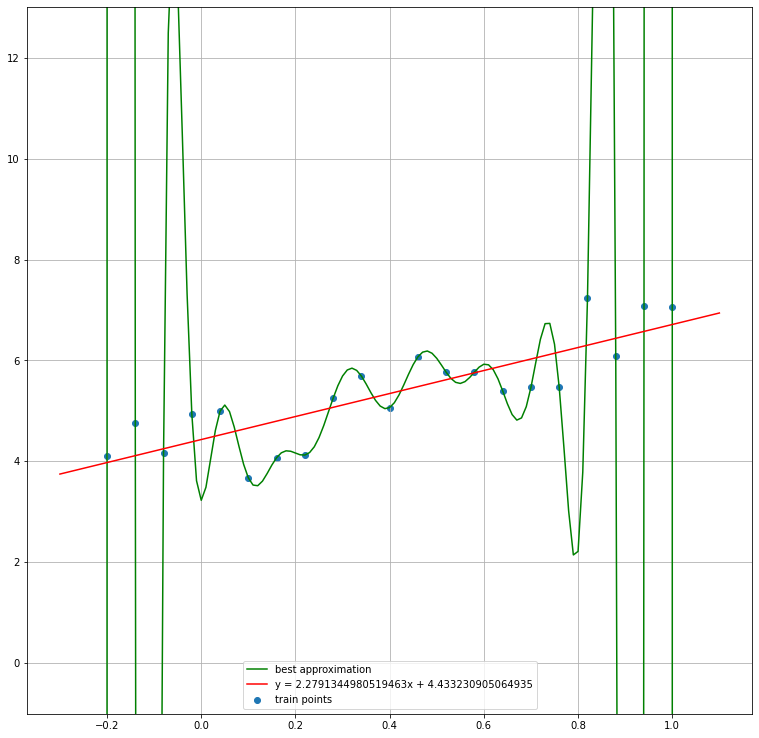

In [357]:
from matplotlib.pyplot import (scatter, legend, ylim)
plt.figure(figsize=(13, 13))
plt.ylim(-1, 13)
n = len(X_train)   
k = n - 1
pol_max = []
X = numpy.array(X_train**k)
for i in range(k - 1, -1, -1):
    pol = numpy.array(X_train ** i)
    X = numpy.column_stack((X, pol))
x_points = numpy.arange(-0.3, 1.10, 0.01)
a = numpy.linalg.solve(X, numpy.array(Y_train))
for x in x_points:
    pol_c = 0
    tmp = 0
    for i in range(k + 1):
        tmp = (x ** (k - i))
        pol_c += tmp * a[i] 
    pol_max.append(pol_c)
plt.plot(x_points, pol_max, color='g', label='best approximation')
a = plt.scatter(X_train, Y_train, label='train points')
X = numpy.linspace(1.1, -0.3,10)
b = plt.plot(X, 2.2791344980519463*X + 4.433230905064935, 'r', label='y = 2.2791344980519463x + 4.433230905064935')
plt.legend()
plt.grid()
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [358]:
# Meam square error for k = 1, 2, ....., 10
B = numpy.ones(len(X_train))
X_tr = numpy.column_stack((X_train, B))
X_ts = numpy.column_stack((X_test, B))
def polynom(degree, X, X_train):
    for i in range(1, degree):
        a = [0] * len(X_train)
        for j in range(len(X_train)):
            a[j] = X_train[j] ** (i + 1)
        X = numpy.column_stack((a,X))
    return X
def upgrade(X, Y_train):
    tmp1 = numpy.dot(X.transpose(), X)
    tmp2 = sla.inv(tmp1)
    tmp3 = numpy.dot(tmp2, X.transpose())
    a = numpy.dot(tmp3, Y_train)
    return a
sum_train = 0
sum_test = 0
x_train = polynom(1, X_tr, X_train)
y_train = upgrade(x_train, Y_train)
x_test = polynom(1, X_ts, X_test)
for i in range(len(x_train)):
    sum_train += (numpy.dot(x_train[i], y_train) - Y_train[i]) ** 2
for i in range(len(x_test)):
    sum_test += (numpy.dot(x_test[i], y_train) - Y_test[i]) ** 2
sum_train /= len(X_train)
sum_test /= len(X_test)
print("m_s_e_train for k = ", 1,": ", sum_train ,"; ", "m_s_e_test for k = ", 1,": ", sum_test, sep="")

#Вычислив СКО для k = 1, впредь я решил вычислять ее не своими руками, а посредством инструментов, встроенных в питон.

for i in range(2, 11):
    x_train = polynom(i, X_tr, X_train)
    y_train = upgrade(x_train, Y_train)
    x_test = polynom(i, X_ts, X_test)
    m_s_e_train = ((numpy.dot(x_train,y_train) - Y_train)**2).mean(axis=0)
    m_s_e_test = ((numpy.dot(x_test,y_train) - Y_test)**2).mean(axis=0)
    print("m_s_e_train for k = ", i,": ", m_s_e_train ,"; ", "m_s_e_test for k = ", i,": ", m_s_e_test, sep="")

m_s_e_train for k = 1: 0.29689663326251964; m_s_e_test for k = 1: 0.4351202004048878
m_s_e_train for k = 2: 0.26969891587669137; m_s_e_test for k = 2: 0.35647628878311644
m_s_e_train for k = 3: 0.2694971871479611; m_s_e_test for k = 3: 0.3553464571518009
m_s_e_train for k = 4: 0.26106653305792754; m_s_e_test for k = 4: 0.4417270189275606
m_s_e_train for k = 5: 0.24998504648317543; m_s_e_test for k = 5: 0.557973202148157
m_s_e_train for k = 6: 0.1882934898837022; m_s_e_test for k = 6: 2.5816929336720063
m_s_e_train for k = 7: 0.18539621153294336; m_s_e_test for k = 7: 2.5157829303937818
m_s_e_train for k = 8: 0.15905556579099814; m_s_e_test for k = 8: 4.357287583219225
m_s_e_train for k = 9: 0.15847184333865322; m_s_e_test for k = 9: 4.776190357299149
m_s_e_train for k = 10: 0.15316617877338254; m_s_e_test for k = 10: 14.630380809645104


Многочлен, который лучше всего приближает неизвестную зависимость - многочлен 3-й степени.

In [359]:
#Coeffs of polynoms for k=1, 2, 3, 4, 6 and their graphics
for i in range(1, 7):
    if i != 5:
        x = polynom(i, X_tr, X_train)
        y = upgrade(x, Y_train)
        print("coeffs of polynom for k =", i, ": ", end="")
        for j in range(len(y) - 1, -1, -1):
            print(y[j], " ", end="")
        print('\n')

coeffs of polynom for k = 1 : 4.433230905064935  2.2791344980519463  

coeffs of polynom for k = 2 : 4.472476503404162  1.1578316883597224  1.4016285121152379  

coeffs of polynom for k = 3 : 4.460736355285102  1.0650161052851612  1.8597508372605294  -0.38176860428792025  

coeffs of polynom for k = 4 : 4.341166120399487  1.171802392631777  6.79409178436671  -13.051328120009572  7.9184746973199225  

coeffs of polynom for k = 6 : 4.383795011022897  -4.597179325214652  16.002903990790784  121.25709713138073  -481.5101328942874  581.4532982552712  -229.97013342451726  



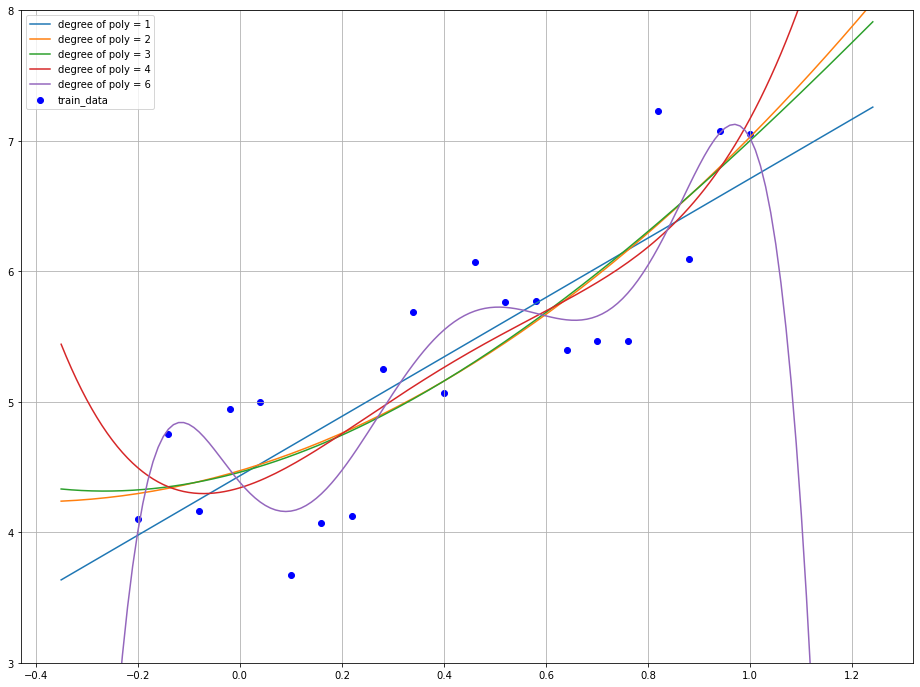

In [360]:
# Для  𝑘=1,2,3,4,6
plt.figure(figsize=(16, 12))
plt.scatter(X_train, Y_train, color='b', label='train_data')
x_points = numpy.arange(-0.35, 1.25, 0.01)
for k in range(1, 7):
    if k != 5:
        X = numpy.array(X_train ** k)
        for i in range(k - 1, -1, -1):
            pol_c = numpy.array(X_train ** i)
            X = numpy.column_stack((X, pol_c))
        res = upgrade(X, Y_train)
        y = []
        for i in x_points:
            pol_c = 0
            tmp = 0
            for j in range(k + 1):
                tmp = (i ** (k - j))
                pol_c += res[j] * tmp
            y.append(pol_c)
        plt.plot(x_points, y, label='degree of poly = ' + str(j))
ylim(3, 8)
plt.legend()
plt.grid()
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Мы подогнали нашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют переобучением. Этим и объясняется поведение ошибки на тестовых данных при k = 10.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [361]:
#y = a1 * x1 + a2 * x2 + a3 * x3 + a4 * x4 + a5 * x5 + a6
# let's find a1, ... , a6
flats = numpy.loadtxt('C:/Users/Илья/Downloads/flats_moscow_mod.txt', delimiter='\t', skiprows=1)
X = numpy.zeros((len(flats), 5))
Y = flats[:,0]
for i in range(len(flats)):
    for j in range(5):
        X[i][j] = flats[i][j + 1]
B = numpy.ones(len(flats))
tmp = numpy.column_stack((X, B))
a = upgrade(tmp, Y)
print('coeff of total size of the apartment =', a[0])
print('coeff of apartment area =', a[1])
print('coeff of kitchen area =', a[2])
print('coeff of distances from center =', a[3])
print('coeff of subway distances =', a[4])
print('free coeff =', a[5])

coeff of total size of the apartment = 1.4870528861258459
coeff of apartment area = 1.6562890012270755
coeff of kitchen area = 1.8192049792747729
coeff of distances from center = -3.327154056274096
coeff of subway distances = -1.3156886037015876
free coeff = -26.789269634186077


Зависимость цены от знака при коэффиценте прямая. Мы видим, что коэффицент при регрессоре, отвечающем за расстояние от центра отрицательный. И все верно, ведь, чем дальше квартира находится от центра, тем она дешевле. Аналогичная ситуация с коэффицентов при регрессоре, отвечающем за расстояние до ближайшего метро. Это согласуется с моим представлением о жизни.

In [362]:
#mean square error
m_s_e = ((numpy.dot(tmp,a) - Y)**2).mean(axis=0)
print(m_s_e)

924.0090032083978


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

В качестве дополнительных признаков я добавил:
1) Степенную функцию от жилой площади квартиры. За показатель степени я взял 8, т.к выяснил, что при 8 этот признак имеет наименьшую СКО при тренировочных данных.
2) Попарные произведения:
    1) Общей и жилой площади.
    2) Общей площади и расстояния до метро
    3) Жилой площади и расстояния до метро
    4) Кухонной площади и расстояния до метро
    Т.к глядя на коэффиценты понятно, что они играют важную роль в стоимости квартиры, их попарные произведения придаут гибкости, которая уменьшит СКО.

In [363]:
def degree(X, x, n):
    a = [0] * len(X)
    for i in range(len(X)):
        a[i] = X[i][n] ** x
    tmp = numpy.column_stack((X, a))
    return tmp
def modify(X):
    tmp = degree(X, 8, 1)
    a = [0] * len(X)
    b = [0] * len(X)
    c = [0] * len(X)
    d = [0] * len(X)
    for i in range(len(X)):
        a[i] = X[i][2] * X[i][3]
        b[i] = X[i][0] * X[i][3]
        c[i] = X[i][1] * X[i][3]
        d[i] = X[i][0] * X[i][1]
    tmp2 = numpy.column_stack((tmp, a))
    tmp3 = numpy.column_stack((tmp2, b))
    tmp4 = numpy.column_stack((tmp3, c))
    tmp5 = numpy.column_stack((tmp4, d))
    return tmp5
from sklearn.model_selection import train_test_split
k = 0
percentage = 0
ma = -1000000
mi = 1000000
a_mse = 0
a_linear_mse = 0
tmp = 0
for i in range(1, 11):
    tmp += 1
    print("try", i, ":", sep="")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
    y_tr = upgrade(modify(X_train), Y_train)
    y_old_train = upgrade(X_train, Y_train)
    a_mse += ((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)
    a_linear_mse += ((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)
    print("modify_m_s_e_test", ((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0))
    if 100-(((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)) / (((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)) * 100 > ma:
        ma = 100-(((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)) / (((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)) * 100
    if 100-(((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)) / (((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)) * 100 < mi:
        mi = 100-(((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)) / (((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)) * 100
    print("linear m_s_e_test", ((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0))
    percentage += 100-(((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0)) / (((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0)) * 100
    if ((numpy.dot(modify(X_test),y_tr) - Y_test)**2).mean(axis=0) < ((numpy.dot(X_test,y_old_train) - Y_test)**2).mean(axis=0):
        k += 1
    print("-----------------------------------")
print('\n')
print("modify version better than old version", k, "times")
print("average m_s_e_test :", a_mse / tmp)
print("average linear_m_s_e_test :", a_linear_mse / tmp)
print("max percentage difference :", ma)
print("min percentage difference :", mi)
print("average percentage difference :", percentage / tmp)
    

try1:
modify_m_s_e_test 889.7045448441319
linear m_s_e_test 1186.5324318700439
-----------------------------------
try2:
modify_m_s_e_test 579.3120083538768
linear m_s_e_test 661.5686219674974
-----------------------------------
try3:
modify_m_s_e_test 979.8319715403555
linear m_s_e_test 1159.1839889695852
-----------------------------------
try4:
modify_m_s_e_test 771.5652171549845
linear m_s_e_test 798.0708070735659
-----------------------------------
try5:
modify_m_s_e_test 947.1951239708706
linear m_s_e_test 1058.4020108921475
-----------------------------------
try6:
modify_m_s_e_test 720.2458699361214
linear m_s_e_test 819.1765908518709
-----------------------------------
try7:
modify_m_s_e_test 744.2413797585186
linear m_s_e_test 1085.8390411001783
-----------------------------------
try8:
modify_m_s_e_test 772.3934022620298
linear m_s_e_test 740.592948480854
-----------------------------------
try9:
modify_m_s_e_test 750.5257668365963
linear m_s_e_test 955.1279780318413
-------

# Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

Так как универсальных способов это сделать нет, воспользуемся методом подбора.

In [364]:
def L2_upgrade(X, i):
    tmp1 = numpy.dot(X.transpose(), X)
    tmp2 = sla.inv(tmp1 + numpy.dot(i, numpy.eye(len(X.transpose()))))
    tmp3 = numpy.dot(tmp2, X.transpose())
    a = numpy.dot(tmp3, Y_train)
    return a;
data_train = numpy.loadtxt('C:/Users/Илья/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('C:/Users/Илья/Downloads/test.txt', delimiter=',')
X_train = data_train[:,0]
Y_train = data_train[:,1]
X_test = data_test[:,0]
Y_test = data_test[:,1]
B = numpy.ones(len(X_train))
X_1 = numpy.column_stack((X_train, B))
X_tr = polynom(6, X_1, X_train)
X_2 = numpy.column_stack((X_test, B))
X_ts = polynom(6, X_2, X_test)
for i in range(-10, 10):
    a = L2_upgrade(X_tr, i)
    m_s_e = ((numpy.dot(X_tr,a) - Y_train)**2).mean(axis=0)
    m_s_e_ts = ((numpy.dot(X_ts,a) - Y_test)**2).mean(axis=0)
    print("m_s_e_train for lamb =", i, ":", m_s_e)
    print("m_s_e_test for lamb=", i, ":", m_s_e_ts)
    print("----------------------------------------")

m_s_e_train for lamb = -10 : 22.878310366769558
m_s_e_test for lamb= -10 : 46.62532475879904
----------------------------------------
m_s_e_train for lamb = -9 : 35.74538659199547
m_s_e_test for lamb= -9 : 70.71529156695975
----------------------------------------
m_s_e_train for lamb = -8 : 105.24858408118693
m_s_e_test for lamb= -8 : 196.16224221658734
----------------------------------------
m_s_e_train for lamb = -7 : 89884.51473741315
m_s_e_test for lamb= -7 : 154520.67396489796
----------------------------------------
m_s_e_train for lamb = -6 : 52.86743362588697
m_s_e_test for lamb= -6 : 83.64734787504807
----------------------------------------
m_s_e_train for lamb = -5 : 10.337294524602918
m_s_e_test for lamb= -5 : 15.376827432821187
----------------------------------------
m_s_e_train for lamb = -4 : 3.4510674877556444
m_s_e_test for lamb= -4 : 5.0309319004170066
----------------------------------------
m_s_e_train for lamb = -3 : 1.3997298375254068
m_s_e_test for lamb= -3 : 

Подбор помог нам понять, что лямбда лежит где-то между единицей и двойкой. Такая ламбда поможет достичь того, чтобы СКО для многочлена 6 степени с регуляризацией была меньше. Так же подбором найдем более конкретное значение ламбды.

In [365]:
i = 1
j = 2
mi = 1000000
while i < j:
    a = L2_upgrade(X_tr, i)
    m_s_e = ((numpy.dot(X_tr,a) - Y_train)**2).mean(axis=0)
    m_s_e_ts = ((numpy.dot(X_ts,a) - Y_test)**2).mean(axis=0)
    if m_s_e_ts < mi:
        mi = m_s_e_ts
        k = i
    print("m_s_e_train for lamb =", i, ":", m_s_e)
    print("m_s_e_test for lamb=", i, ":", m_s_e_ts)
    print("----------------------------------------")
    i += 0.01
print("final lambda:", round(k, 2))

m_s_e_train for lamb = 1 : 0.31961107399035493
m_s_e_test for lamb= 1 : 0.30821992357122946
----------------------------------------
m_s_e_train for lamb = 1.01 : 0.3205161509132944
m_s_e_test for lamb= 1.01 : 0.3081111232030758
----------------------------------------
m_s_e_train for lamb = 1.02 : 0.3214281075700685
m_s_e_test for lamb= 1.02 : 0.30800969422771735
----------------------------------------
m_s_e_train for lamb = 1.03 : 0.322346913920571
m_s_e_test for lamb= 1.03 : 0.30791560103606175
----------------------------------------
m_s_e_train for lamb = 1.04 : 0.32327254010178375
m_s_e_test for lamb= 1.04 : 0.30782880832336784
----------------------------------------
m_s_e_train for lamb = 1.05 : 0.32420495642677355
m_s_e_test for lamb= 1.05 : 0.3077492810840882
----------------------------------------
m_s_e_train for lamb = 1.06 : 0.3251441333836742
m_s_e_test for lamb= 1.06 : 0.3076769846068919
----------------------------------------
m_s_e_train for lamb = 1.07 : 0.326090041

In [366]:
print("old_det:", sla.det(numpy.dot(X_tr.transpose(), X_tr)))
print("new_det:", sla.det(numpy.dot(X_tr.transpose(), X_tr) + numpy.dot(k, numpy.eye(len(X_tr.transpose())))))

old_det: 9.082864838260409e-12
new_det: 1020.83333842008


Мы видим, что определитель старой матрицы крайне близок к 0, т.к (X^T) * X близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений.
Определители так сильно отличаются, т.к прибавив к матрице X * X^T единичную матрицу, умноженную на лямбду, мы отклонили каждое значение. Этим и объясняется такая разница в определителях.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

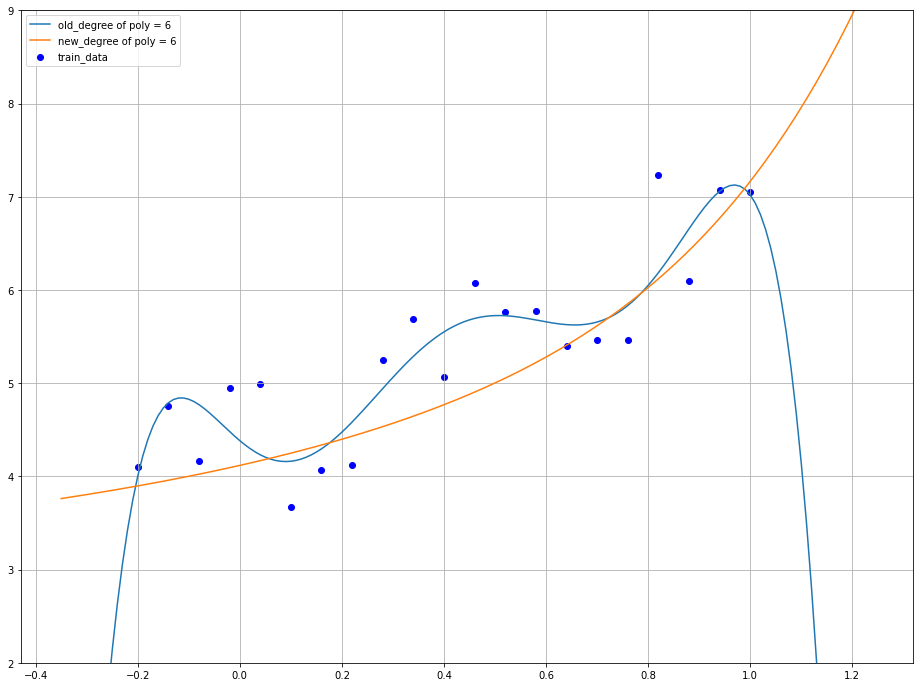

In [367]:
plt.figure(figsize=(16, 12))
plt.scatter(X_train, Y_train, color='b', label='train_data')
x_points = numpy.arange(-0.35, 1.25, 0.01)
for k in range(6, 7):
    if k != 5:
        X = numpy.array(X_train ** k)
        for i in range(k - 1, -1, -1):
            pol_c = numpy.array(X_train ** i)
            X = numpy.column_stack((X, pol_c))
        res = upgrade(X, Y_train)
        res2 = L2_upgrade(X, 1.6)
        y = []
        for i in x_points:
            pol_c = 0
            tmp = 0
            for j in range(k + 1):
                tmp = (i ** (k - j))
                pol_c += res[j] * tmp
            y.append(pol_c)
        plt.plot(x_points, y, label='old_degree of poly = ' + str(j))
        z = []
        for i in x_points:
            pol_c = 0
            temp = 0
            for j in range(k + 1):
                tmp = (i ** (k - j))
                pol_c += res2[j] * tmp
            z.append(pol_c)
        plt.plot(x_points, z, label='new_degree of poly = ' + str(j))
ylim(2, 9)
plt.legend()
plt.grid()
plt.show()

График модели с регуляризацией более плавный, в виду того что коэффициенты с регуляризацией стали намного меньше по модулю, т.е нет разброса, т.е переобучение отсутствует.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.